In [1]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, colors
from matplotlib.patches import Ellipse

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
%elogin

In [4]:
%erun PHZ_NNPZ

In [5]:
import nnpz.neighbor_selection.brute_force_methods as bfm

In [6]:
def plot_contour(ax, coords_x, coords_y, xerror, yerror, method, sqrt=False):
    center_x = np.mean(coords_x)
    center_y = np.mean(coords_y)
    center = np.array([center_x, center_y])
    center_error = np.array([xerror, yerror])
    
    # Distance values
    xx, yy = np.meshgrid(coords_x, coords_y)
    ref_coords = np.column_stack([xx.ravel(), yy.ravel()])
    ref_errors = np.zeros(ref_coords.shape)

    distances, scales = method(ref_coords, ref_errors, center, center_error)
    distances = distances.reshape(len(coords_x), -1)
    if sqrt:
        distances = np.sqrt(distances)
    scales = scales.reshape(len(coords_x), -1)
    
    dist_contour = ax.contourf(coords_x, coords_y, distances, zorder=-1, cmap='magma_r', levels=20)
    plt.colorbar(dist_contour, ax=ax)
    
    # Target object
    ax.add_patch(Ellipse((center_x, center_y), xerror*2, yerror*2, color='red'))

    # Info
    ax.set_title((type(method).__name__))

## 'Normal' distances

/home/aalvarez/Work/Projects/PHZ_NNPZ/0.9/InstallArea/x86_64-fc31-gcc93-dbg/python/nnpz/neighbor_selection/brute_force_methods/AngularDistance.py:17: RuntimeWarning: invalid value encountered in arccos
  return np.sin(np.arccos(angular)), np.ones(angular.shape)
/home/aalvarez/Work/Projects/PHZ_NNPZ/0.9/InstallArea/x86_64-fc31-gcc93-dbg/python/nnpz/neighbor_selection/brute_force_methods/DirectedDistance.py:22: RuntimeWarning: invalid value encountered in arccos
  return euclidean * np.sin(np.arccos(angular)) ** 2, np.ones(euclidean.shape)


1.77 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


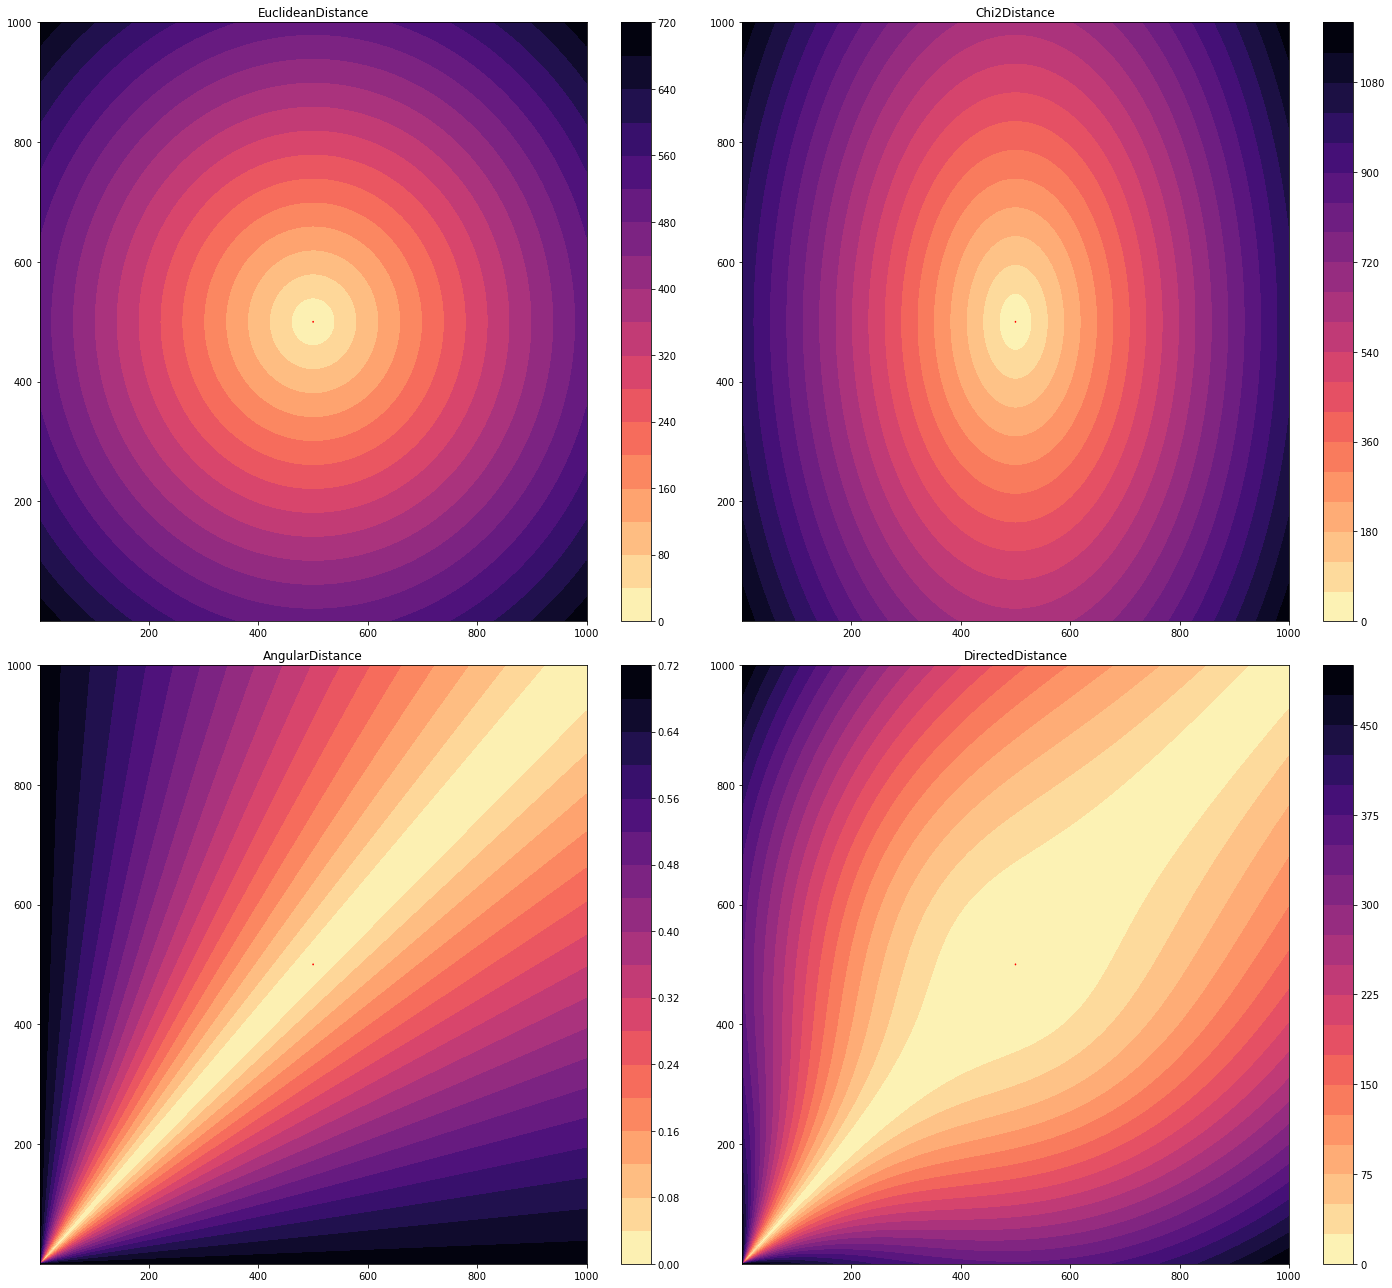

In [7]:
%%timeit -n1 -r1

coords_x = np.linspace(0.01, 1e3, 1000)
coords_y = np.linspace(0.01, 1e3, 1000)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 18))
plot_contour(axes[0, 0], coords_x, coords_y, 0.5, 0.8, method=bfm.EuclideanDistance())
plot_contour(axes[0, 1], coords_x, coords_y, 0.5, 0.8, method=bfm.Chi2Distance(), sqrt=True)
plot_contour(axes[1, 0], coords_x, coords_y, 0.5, 0.8, method=bfm.AngularDistance())
plot_contour(axes[1, 1], coords_x, coords_y, 0.5, 0.8, method=bfm.DirectedDistance(), sqrt=True)

plt.tight_layout()